# Correr, el ejercicio más completo - C312

Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

## Cargar los datos

In [9]:
import pandas as pd

# Ruta del primer archivo CSV
file_path = 'fitness_analysis.csv' 
# Cargar el segundo archivo CSV en otro DataFrame
df = pd.read_csv(file_path)

# Concatenar df2 al final de df1

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['SedentaryActiveDistance', 'SedentaryMinutes', 'Unnamed: 0'])

# Identificar las filas donde 'TotalSteps' es igual a 0 porque no nos interesan las personas que no corrieron nada
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

Nuestro dataset tomado del sitio web *kaggle.com* describe en una carrera donde participaron corredores profesionales y personas promedio, los distintos momentos para cada uno según el nivel de intensidad al que corrieron, el tiempo que se tomaron para cada nivel de intensidad y la cantidad de calorias quemadas. Las variables estudiadas son:
- TotalSteps
- TotalDistance

- VeryActiveDistance
- ModeratelyActiveDistance
- LightActiveDistance
- SedentaryActiveDistance

- VeryActiveMinutes
- FairlyActiveMinutes
- LightlyActiveMinutes
- SedentaryMinutes

- Calories

Pero al faltar en algunas columnas algunas mediciones decidimos cojer un subconjunto de los datos que estuviera correcto y es el que usaremos. Tambien no usaremos SedentaryActiveDistance, SedentaryMinutes pues la mayoria de sus datos son ceros y no nos aporta nada.

Para un mejor análisis agregamos a nuestro dataset dos nuevas columnas:
- TotalMinutes: suma de las variables de tiempos de los distintos niveles de intensidad
- Velocidad: la tomamos como la velocidad media por cada observación, o sea, la distancia recorrida en total dividida por el tiempo total que anterirmente agregamos

In [10]:
import pandas as pd

# Añadir los minutos totales
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

# Añadir velocidad
df['Velocidad'] = df['TotalDistance'] / df['TotalMinutes']

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalMinutes,Velocidad
count,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000
mean,10553.894,7.644,2.651,0.974,3.985,36.653,23.351,218.564,2582.896,278.568,0.028
std,4427.512,3.646,3.101,0.959,1.716,35.420,21.735,80.591,713.994,85.262,0.010
min,400.000,0.260,0.010,0.010,0.060,1.000,1.000,8.000,633.000,26.000,0.009
25%,7796.750,5.442,0.580,0.340,2.710,9.000,9.000,162.250,2030.750,230.250,0.021
50%,10237.500,7.190,1.650,0.690,3.975,27.000,16.000,216.500,2506.000,284.000,0.026
75%,12764.000,9.140,3.430,1.230,5.097,53.000,31.000,272.750,3030.500,335.000,0.030
max,36019.000,28.030,21.920,6.480,12.510,210.000,143.000,518.000,4900.000,552.000,0.076


## Mostrar histograma con los datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegúrate de que 'df' es tu DataFrame
for column in df.columns:
    plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura
    sns.histplot(df[column], kde=True) # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de {column}') # Título del gráfico
    plt.show() # Muestra el gráfico

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [15]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de TotalSteps es 2.6447759456537057
La Asimetría de TotalSteps es 0.9254979012092557
El kurtosis de TotalDistance es 5.2628607028398715
La Asimetría de TotalDistance es 1.6093430806022293
El kurtosis de VeryActiveDistance es 7.918057149357303
La Asimetría de VeryActiveDistance es 2.4288856221105988
El kurtosis de ModeratelyActiveDistance es 7.536018613394207
La Asimetría de ModeratelyActiveDistance es 2.3824816395466293
El kurtosis de LightActiveDistance es 0.9854267658924436
La Asimetría de LightActiveDistance es 0.44102199675725096
El kurtosis de VeryActiveMinutes es 3.4559914670398104
La Asimetría de VeryActiveMinutes es 1.6286345577589503
El kurtosis de FairlyActiveMinutes es 6.833277627283948
La Asimetría de FairlyActiveMinutes es 2.286677629713413
El kurtosis de LightlyActiveMinutes es 0.09232979122388096
La Asimetría de LightlyActiveMinutes es 0.05652405019287759
El kurtosis de Calories es -0.20299902514933432
La Asimetría de Calories es 0.4644460585930213
El kurtosi

- Columnas con alta curtosis y asimetría positiva o negativa: Estas columnas (VeryActiveDistance, ModeratelyActiveDistance, VeryActiveMinutes, FairlyActiveMinutes) probablemente tienen distribuciones que son menos normales. Podrían tener colas pesadas y valores atípicos, lo que podría afectar el rendimiento de ciertos métodos estadísticos que asumen normalidad.
- Columnas con baja curtosis y asimetría cercana a cero: Estas columnas (LightActiveDistance, LightlyActiveMinutes, Calories, TotalMinutes, Velocidad) parecen tener distribuciones más normales. La falta de colas pesadas y la simetría en la distribución sugiere que estos datos podrían ser más adecuados para métodos estadísticos que asumen normalidad.

### Test de Normalidad

In [36]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

TotalSteps
D = 1.0
p-value = 0.0

TotalDistance
D = 0.9424620172784777
p-value = 1.9792358347568633e-124

VeryActiveDistance
D = 0.5255158320701063
p-value = 2.939739931173272e-26

ModeratelyActiveDistance
D = 0.5296176947371185
p-value = 1.0751104370492405e-26

LightActiveDistance
D = 0.8743502263331446
p-value = 1.97806356165818e-90

VeryActiveMinutes
D = 0.9472498680518208
p-value = 3.3372269494050743e-128

FairlyActiveMinutes
D = 0.9786501019683699
p-value = 1.7402454649180068e-167

LightlyActiveMinutes
D = 1.0
p-value = 0.0

Calories
D = 1.0
p-value = 0.0

TotalMinutes
D = 1.0
p-value = 0.0

Velocidad
D = 0.5034574563482161
p-value = 5.49018749311756e-24



La mayoría de las columnas en tu DataFrame tienen distribuciones que son menos normales, con algunas columnas que difieren significativamente de la normalidad. Esto es evidente tanto en las pruebas de kurtosis y asimetría, donde columnas con alta curtosis y asimetría positiva indican distribuciones menos normales, como en las pruebas de Kolmogorov-Smirnov, donde columnas con valores D altos y valores p bajos indican que los datos difieren significativamente de la normalidad.

## Predecir Calorias

Puede la cantida de calorías que quema una persona al correr depender linealmente de la distancia y el tiempo que le toma para distintos niveles de intensidad?

Para dar respuesta a ello vamos a usar un modelo de regresión lineal donde seleccionaremos algunas de nuestras variables para intentar predecir las calorias, pero para ello es necesario analizar cuidadosamente qué variables tomaremos.

Vamos a observar por medio de los siguientes gráficos como se comportan las calorias según el resto de nuestras variables

In [ ]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

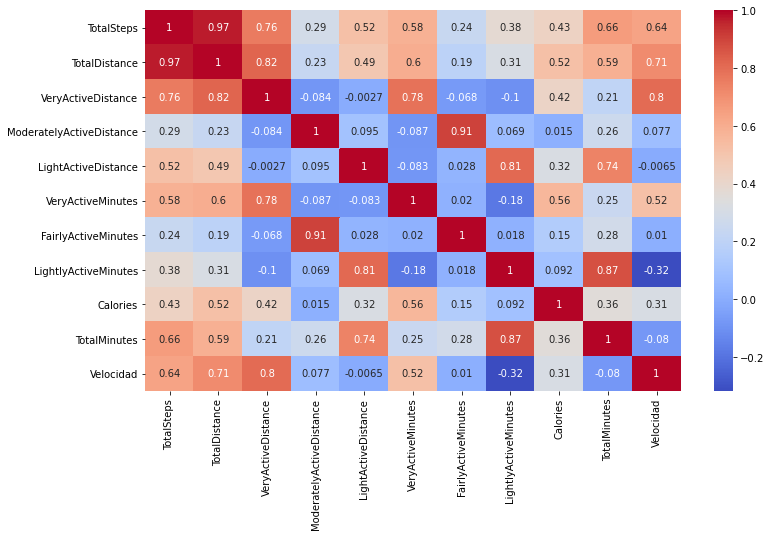

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

### Modelo 1

Vamos a hacer el análisis con todas las variables para intentar predecir Calorías

In [38]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          1.88e-178
Time:                        16:49:24   Log-Likelihood:                -4244.3
No. Observations:                 587   AIC:                             8509.
Df Residuals:                     577   BIC:                             8552.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 174124.35071290898
Coeficiente de Determinación R^2: 0.7056969457769641


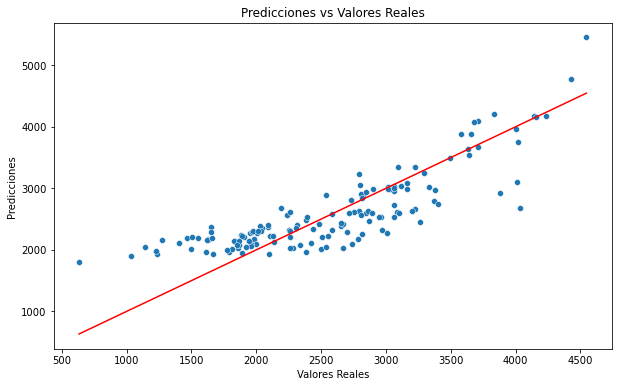

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como observamos anteriormente en los resultados de **model.summary()** vemos que hay una variable cuyo $P > |t|$ es mayor que 0.05, lo cual indica que no es significativa en el modelo y puede llevar a errores en el resultado. Por lo que hagamos otro modelo pero esta vez eliminandola.

### Modelo 2

Eliminemos `SedentaryActiveDistance` de nuestro conjunto de entrenamiento

In [42]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('Velocidad', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          1.18e-179
Time:                        16:50:35   Log-Likelihood:                -4244.3
No. Observations:                 587   AIC:                             8507.
Df Residuals:                     578   BIC:                             8546.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 174186.22220538626
Coeficiente de Determinación R^2: 0.7055923712638024


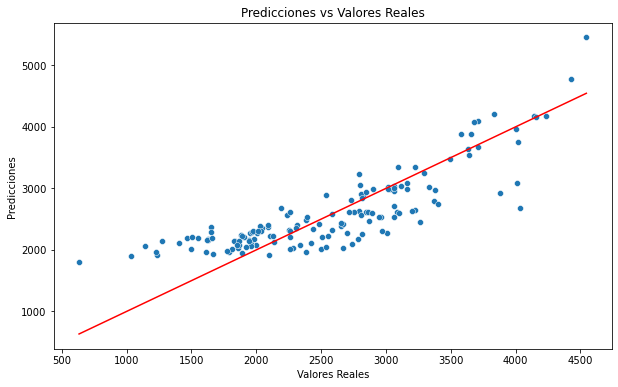

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como podemos observar los resultados fueron un poco mejores, sin embargo en la descripción de los resultados del modelo, a pesar que solucionamos quedarnos con variables significativas segun su $P > |t|$ vemos que hay un *warning* al final que nos indica que el número de la condición es muy grande, lo que podría sugerir problemas de multicolinealidad. Esto significa que algunas de las variables independientes están altamente correlacionadas entre sí, lo que puede hacer que los coeficientes sean inestables y difíciles de interpretar.

### Modelo 3

Vamos a intentar ahora según la información proporcionada por la matriz de correlación eliminar variables que tengan entre ellas una fuerte dependencia para intentar minimizar la multicolinealidad

- Si tenemos la distancia total recorrida vamos a eliminar el total de pasos dados
- Entre la distancia recorrida con alta intensidad y los minutos demorados en esa intensidad existe una alta correlación, por lo cual nos quedaremos con la variable que tenga mayor correlación con calorías, en este caso con los minutos, por lo que eliminamos la distancia a alta intensidad.
- Lo anterior ocurre también con la intensidad media
- En el caso de la intensidad ligera nos quedaremos con la distancia porque tiene mayor correlación con las calorías

In [53]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('TotalSteps', axis=1)
X = X.drop('VeryActiveDistance', axis=1)
X = X.drop('ModeratelyActiveDistance', axis=1)
X = X.drop('LightlyActiveMinutes', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     97.73
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.11e-84
Time:                        16:52:32   Log-Likelihood:                -4472.3
No. Observations:                 587   AIC:                             8959.
Df Residuals:                     580   BIC:                             8989.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2122.8128    

In [55]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 293082.5768034108
Coeficiente de Determinación R^2: 0.5046350660338362


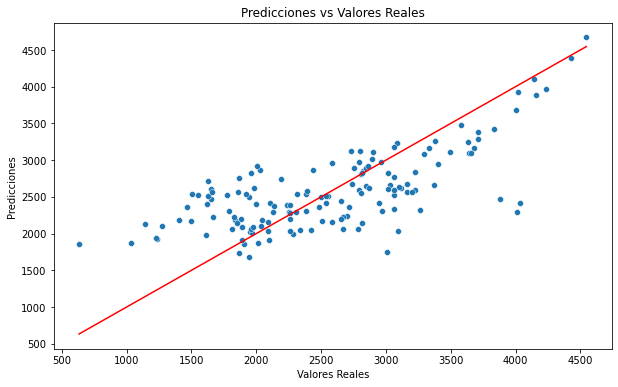

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Vemos en los resultados del modelo que `TotalDistance` ahora tiene un valor no deseado en la columna $P > |t|$ por lo cual efectuemos otro modelo eliminando esta variable

### Modelo 4

In [58]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1)
X = X.drop('TotalSteps', axis=1)
X = X.drop('VeryActiveDistance', axis=1)
X = X.drop('ModeratelyActiveDistance', axis=1)
X = X.drop('LightlyActiveMinutes', axis=1)
X = X.drop('TotalDistance', axis=1)
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.30e-85
Time:                        16:52:55   Log-Likelihood:                -4473.2
No. Observations:                 587   AIC:                             8958.
Df Residuals:                     581   BIC:                             8985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1913.9846    

In [60]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 292794.9881056722
Coeficiente de Determinación R^2: 0.5051211452740916


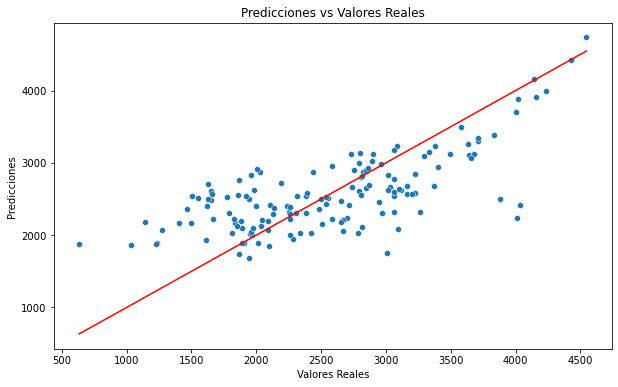

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

En este modelo podemos ver que en la descripción los valores de p-value son aceptables, sin embargo tenemos problemas de mal condicionamiento pudiendo ser producto a multicolinealidad

### Modelo 5

In [98]:
from sklearn.model_selection import train_test_split
print(column_names)
# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df[["TotalDistance", "VeryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", "ModeratelyActiveDistance"]]
y = df['Calories']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories']


In [99]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           6.80e-91
Time:                        17:02:20   Log-Likelihood:                -4460.3
No. Observations:                 587   AIC:                             8933.
Df Residuals:                     581   BIC:                             8959.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [100]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 273388.28496488044
Coeficiente de Determinación R^2: 0.5379221405590743


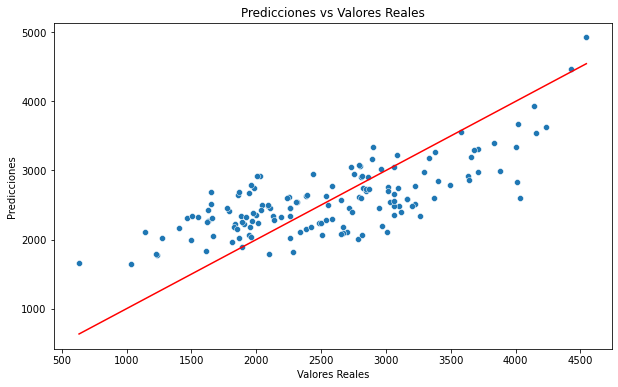

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Podemos ver que tenemos valores deseados en la columna $P > |t|$ a y nos quitamos el warning que alertaba sobre multicolinealidad

## Análisis de residuos

### Code

In [102]:
residuos = model.resid

In [103]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -1.2193736461589345e-12
La media de los residuos es cero.
Suma de los residuos: -7.166818249970675e-10
La suma de los residuos es cero.


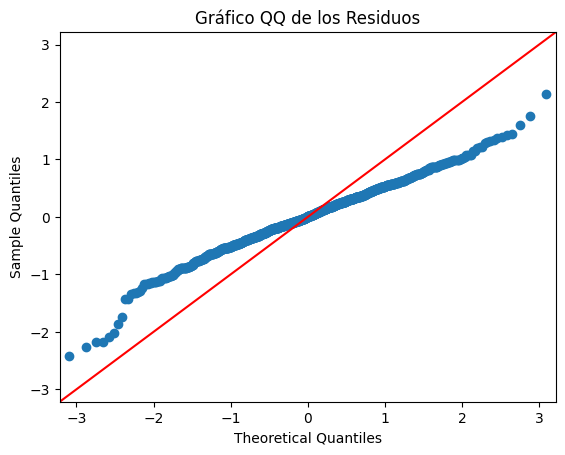

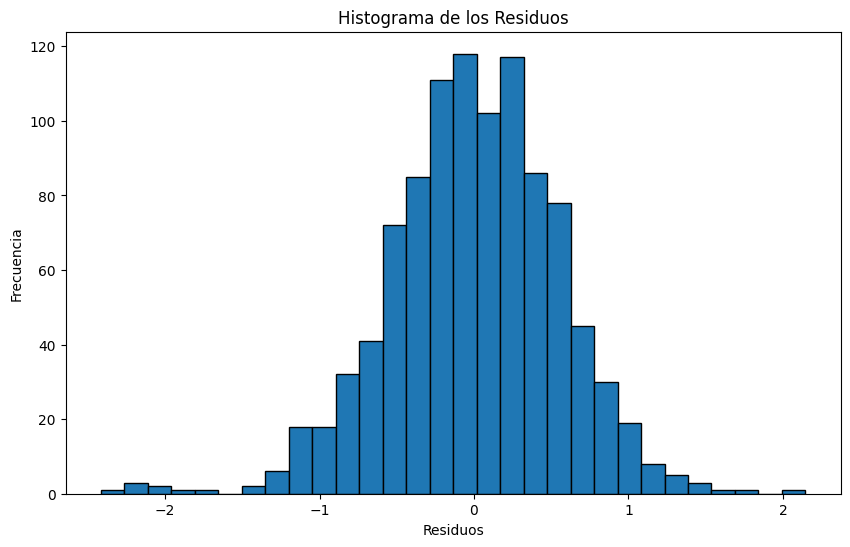

In [101]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Como vemos los residuos del modelo no siguen una distribución normal, esto puede tener varias implicaciones:

- Inferencias estadísticas: Muchos métodos estadísticos, incluyendo la regresión lineal y ANOVA, asumen que los residuos son normalmente distribuidos. Si esta suposición se viola, las inferencias estadísticas (como los intervalos de confianza y las pruebas de hipótesis) que se basan en el modelo pueden no ser válidas.
- Eficiencia del modelo: Un modelo con residuos no normales puede no ser el modelo más eficiente para los datos. Es posible que exista otro modelo que se ajuste mejor a estos.
- Violación de otros supuestos: Los residuos no normales a menudo indican que se están violando otros supuestos del modelo. Por ejemplo, podrían sugerir que la relación entre las variables no es lineal, o que la varianza de los residuos no es constante (heterocedasticidad).

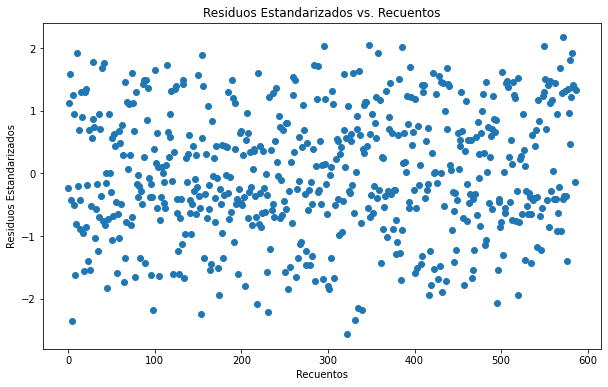

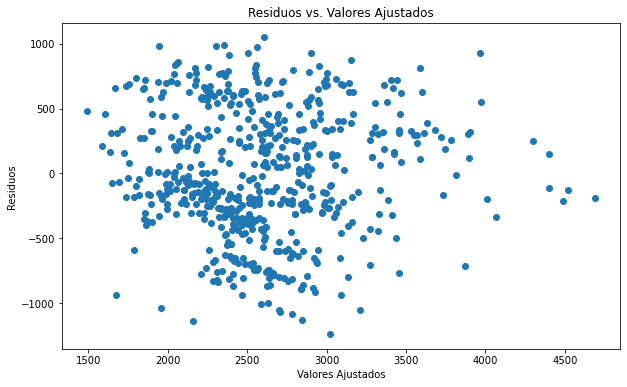

[('Lagrange multiplier statistic', 34.450325172436614), ('p-value', 1.9366880362149658e-06), ('f-value', 7.2448287772251625), ('f p-value', 1.35375504713541e-06)]


In [104]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [105]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.5195911413969146, p-value = 6.5033227915856e-148
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo

Los residuos no están normalmente distribuidos

## PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [108]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns 

Index(['TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories'],
      dtype='object')

In [109]:
# Aplicando PCA
pca = PCA()
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

[[-5.70056720e-01 -3.54927262e-01 -5.21284687e-01 ...  2.10884549e-01
   8.99139856e-02 -1.82584937e-02]
 [ 2.22356882e+00 -8.48954422e-01 -3.43312173e-01 ... -5.30965821e-03
   2.06502678e-01 -4.26488618e-02]
 [ 3.72843947e-01 -8.49661823e-01 -1.00783662e+00 ...  4.32157991e-02
   6.56688157e-02 -5.49755319e-03]
 ...
 [ 5.85169376e-02  4.12202898e-01 -1.31628765e+00 ...  1.87667953e-01
  -1.94272263e-02 -1.92092073e-03]
 [ 5.41109221e+00 -1.82038764e+00 -7.41667786e-01 ...  2.83144448e-01
  -2.89329627e-01  5.56900783e-02]
 [-1.44139862e+00 -9.34248815e-01 -7.18991895e-01 ...  2.87456257e-01
  -1.31434578e-01  4.15178432e-02]]


A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 43.04%
Componente principal 2: 23.60%
Componente principal 3: 19.78%
Componente principal 4: 8.19%
Componente principal 5: 2.81%
Componente principal 6: 1.60%
Componente principal 7: 0.74%
Componente principal 8: 0.20%
Componente principal 9: 0.03%

Varianza acumulada:
Hasta el componente principal 1: 43.04%
Hasta el componente principal 2: 66.65%
Hasta el componente principal 3: 86.42%
Hasta el componente principal 4: 94.61%
Hasta el componente principal 5: 97.43%
Hasta el componente principal 6: 99.02%
Hasta el componente principal 7: 99.77%
Hasta el componente principal 8: 99.97%
Hasta el componente principal 9: 100.00%


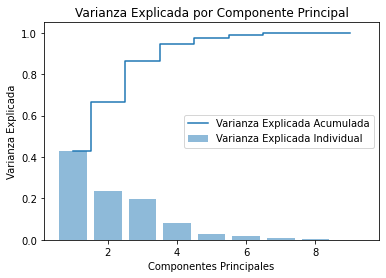

In [110]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Como podemos observar, las componente a partir de la 3ra explican cada una menos del 10% de la varianza de los datos, por lo que para nuestro proyecto tomaremos solo 3 componentes, con lo cual estaríamos abarcando un 73.71% de los datos.

Se realiza un análisis de los componentes principales y para cada uno se identifican las características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.


In [111]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)


# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]
principal_component3 = principal_components.iloc[2]


# Valores maximos absolutos de cada componente
max1 = principal_component1.abs().nlargest(1).values
max2 = principal_component2.abs().nlargest(1).values
max3 = principal_component3.abs().nlargest(1).values


# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(principal_component1.size).index
print("Las características más importantes para el componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    if abs(principal_component1[characteristic]) > max1/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(principal_component2.size).index
print("\nLas características más importantes para el componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    if abs(principal_component2[characteristic]) > max2/2:
        print(f"{i}. {characteristic}")


# Obtener las características más importantes para el tercer componente principal (PC3)
pc3_characteristics = principal_component3.abs().nlargest(principal_component3.size).index
print("\nLas características más importantes para el componente principal (PC3) son:")
for i, characteristic in enumerate(pc3_characteristics, start=1):
    if abs(principal_component3[characteristic]) > max3/2:
        print(f"{i}. {characteristic}")



Las características más importantes para el componente principal (PC1) son:
1. TotalDistance
2. TotalSteps
3. VeryActiveDistance
4. VeryActiveMinutes
5. Calories
6. LightActiveDistance

Las características más importantes para el componente principal (PC2) son:
1. ModeratelyActiveDistance
2. LightlyActiveMinutes
3. FairlyActiveMinutes
4. LightActiveDistance
5. VeryActiveMinutes
6. VeryActiveDistance

Las características más importantes para el componente principal (PC3) son:
1. FairlyActiveMinutes
2. ModeratelyActiveDistance
3. LightlyActiveMinutes
4. LightActiveDistance


Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

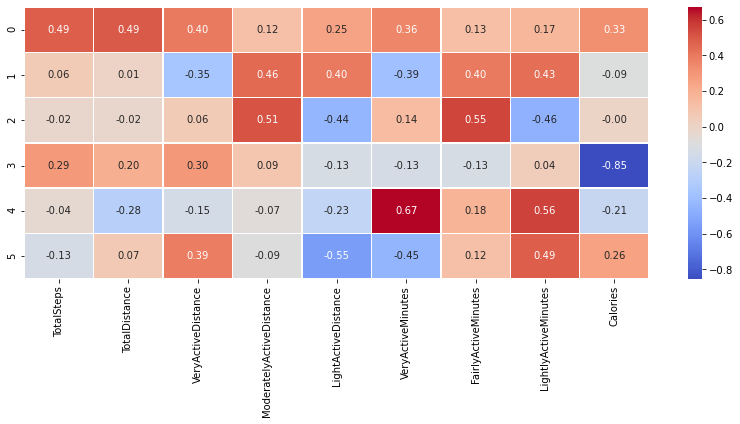

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de calor con seaborn
plt.figure(figsize=(14, 5)) 
sns.heatmap(principal_components[:6], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Mostrar la tabla de calor
plt.show()

## Modelo de Regresión lineal con las componentes principales

In [113]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [123]:
pca = PCA(n_components=3)  # Ajusta el número de componentes
X_pca = pca.fit_transform(pca_data)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [125]:
# model = LinearRegression()
# model.fit(X_train, y_train)

# predictions = model.predict(X_test)

import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.506e+08
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:08:37   Log-Likelihood:                -189.20
No. Observations:                 587   AIC:                             386.4
Df Residuals:                     583   BIC:                             403.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2582.8978      0.014   1.87e+05      0.0

In [126]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 273388.28496488044
Coeficiente de Determinación R^2: 0.5379221405590743


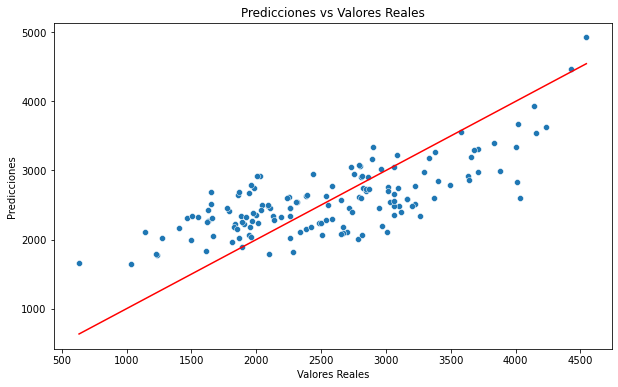

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

## Análisis de residuos del modelo con las componentes principales

In [128]:
residuos = model.resid

In [129]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 7.165950588926393e-15
La media de los residuos es cero.
Suma de los residuos: 4.206412995699793e-12
La suma de los residuos es cero.


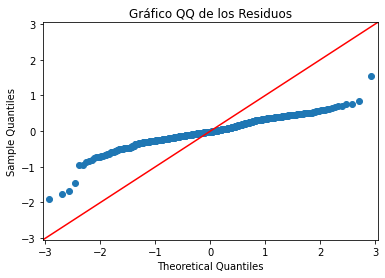

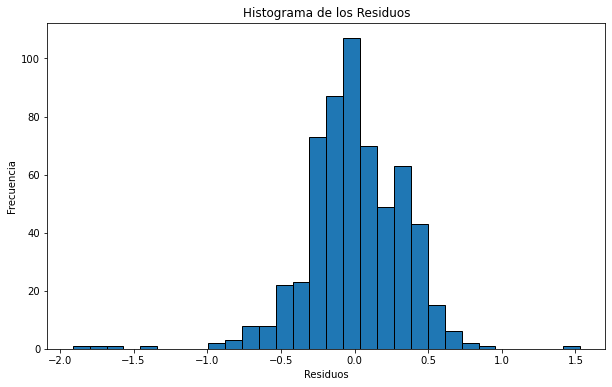

In [130]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

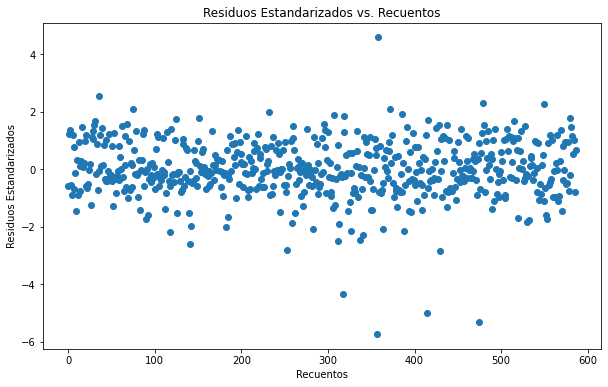

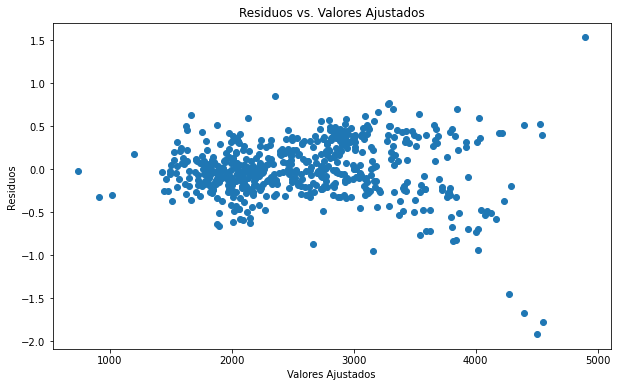

[('Lagrange multiplier statistic', 99.82741511700722), ('p-value', 1.6927939740839557e-21), ('f-value', 39.82119466430521), ('f p-value', 2.021895066344763e-23)]


In [131]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

In [133]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.27412944803992295, p-value = 1.79264909244431e-39
Los residuos no parecen estar normalmente distribuidos.
